In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!git clone https://github.com/beltobel/Tnxs-kifiya3-week1-repo.git


fatal: destination path 'Tnxs-kifiya3-week1-repo' already exists and is not an empty directory.


In [8]:
import os
os.chdir('Tnxs-kifiya3-week1-repo')

In [9]:
!ls

notebook  README.md  requirements.txt  scripts	src  Tnxs-kifiya3-week1-repo


In [10]:
cd ..

/content


In [11]:
cd Tnxs-kifiya3-week1-repo

/content/Tnxs-kifiya3-week1-repo


In [12]:
!ls

notebook  README.md  requirements.txt  scripts	src  Tnxs-kifiya3-week1-repo


In [13]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Tnxs-kifiya3-week1-repo/

nothing added to commit but untracked files present (use "git add" to track)


In [ ]:
!git checkout task-1

Branch 'task-1' set up to track remote branch 'task-1' from 'origin'.
Switched to a new branch 'task-1'


In [ ]:
!git checkout task-1

Already on 'task-1'
Your branch is up to date with 'origin/task-1'.


In [ ]:
!git config --global user.email "beletebogale2@gmail.com"
!git config --global user.name "beltobel"


In [ ]:
!git add .

In [ ]:
!git commit -m"new change from colab"

On branch task-1
Your branch is up to date with 'origin/task-1'.

nothing to commit, working tree clean


In [ ]:
!git push

fatal: could not read Username for 'https://github.com': No such device or address


In [14]:
import pandas as pd


In [ ]:
# import sys
# import os

# Add the path to the src directory
# sys.path.append(os.path.abspath('../src'))

In [15]:
# Import necessary libraries
from src.data_and_preprocessing import load_data, preprocess_data
# from src.text_analysis import analyze_sentiment, extract_keywords
from src.time_series_analysis import publication_frequency
from src.publishers_analysis import publisher_activity, unique_domains


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
cd ..

/content


In [18]:
df = load_data('../../content/drive/My Drive/kifiya3_training/raw_analyst_ratings.csv')  # Adjust the path as needed
# Load and preprocess data
# df = load_data('raw_analyst_ratings.csv')



In [39]:
# Remove any unnamed columns if they exist
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


In [40]:
# Display basic info
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   headline           100000 non-null  object
 1   url                100000 non-null  object
 2   publisher          100000 non-null  object
 3   date               100000 non-null  object
 4   stock              100000 non-null  object
 5   preprocessed_text  100000 non-null  object
 6   sentiment          100000 non-null  object
 7   sentiment_label    100000 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


In [41]:
# Summary statistics
print(df.describe())

                       headline  \
count                    100000   
unique                    79434   
top     Benzinga's Top Upgrades   
freq                        403   

                                                      url      publisher  \
count                                              100000         100000   
unique                                              86957            522   
top     https://www.benzinga.com/news/20/03/15538835/s...  Paul Quintaro   
freq                                                  117          16791   

                       date   stock      preprocessed_text  \
count                100000  100000                 100000   
unique                 6577     388                  66933   
top     2009-08-10 00:00:00      AA  stocks moving session   
freq                    196    2739                   2370   

                                                sentiment sentiment_label  
count                                              10000

In [42]:
# Check for missing values
print(df.isnull().sum())

headline             0
url                  0
publisher            0
date                 0
stock                0
preprocessed_text    0
sentiment            0
sentiment_label      0
dtype: int64


In [43]:
df = preprocess_data(df)

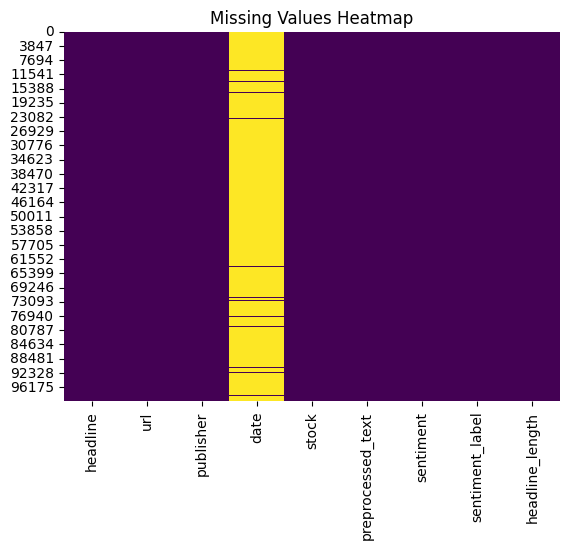

In [44]:
# Plot missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [45]:
# Check conversion results
print(df['date'].isna().sum(), "dates could not be parsed.")
print(df['date'].head(20))

96314 dates could not be parsed.
0    2020-06-05 10:30:54-04:00
1    2020-06-03 10:45:20-04:00
2    2020-05-26 04:30:07-04:00
3    2020-05-22 12:45:06-04:00
4    2020-05-22 11:38:59-04:00
5    2020-05-22 11:23:25-04:00
6    2020-05-22 09:36:20-04:00
7    2020-05-22 09:07:04-04:00
8    2020-05-22 08:37:59-04:00
9    2020-05-22 08:06:17-04:00
10                         NaT
11                         NaT
12                         NaT
13                         NaT
14                         NaT
15                         NaT
16                         NaT
17                         NaT
18                         NaT
19                         NaT
Name: date, dtype: datetime64[ns, UTC-04:00]


In [46]:

# Descriptive Statistics
print(df.describe())
print("Number of articles per publisher:", publisher_activity(df))

       headline_length
count    100000.000000
mean         73.639590
std          40.465787
min           7.000000
25%          47.000000
50%          65.000000
75%          88.000000
max         458.000000
Number of articles per publisher: publisher
Paul Quintaro                   16791
Lisa Levin                      14137
Benzinga Newsdesk               10856
Charles Gross                    6523
Monica Gerson                    6181
                                ...  
Dennis Dick                         1
Neal Goyal                          1
Scott Schneider                     1
Jenna Wang                          1
David Russell - TradeStation        1
Name: count, Length: 522, dtype: int64


In [24]:

# Time Series Analysis
freq = publisher_activity(df)

# Publisher Analysis
print("Unique domains:", unique_domains(df))

Unique domains: domain
N/A                       1399240
benzinga.com                 7937
gmail.com                     139
andyswan.com                    5
investdiva.com                  2
tothetick.com                   2
eosdetroit.io                   1
forextraininggroup.com          1
stockmetrix.net                 1
Name: count, dtype: int64


In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# Download necessary NLTK resources
nltk.download('vader_lexicon')
nltk.download('stopwords')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:


def preprocess_text(text):
    """
    Preprocess the input text: tokenize using split, remove stopwords, and lower case.
    """
    stop_words = set(stopwords.words('english'))
    tokens = text.lower().split()  # Tokenize by splitting on spaces and lowercasing
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]  # Remove stopwords and non-alphabetic words
    return ' '.join(filtered_tokens)

def analyze_sentiment(df, column_name):
    """
    Perform sentiment analysis on a specific column of a DataFrame.
    """
    sia = SentimentIntensityAnalyzer()
    # Apply preprocessing and sentiment analysis
    df['preprocessed_text'] = df[column_name].apply(preprocess_text)
    df['sentiment'] = df['preprocessed_text'].apply(lambda x: sia.polarity_scores(x))
    df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x['compound'] > 0.05 else ('negative' if x['compound'] < -0.05 else 'neutral'))
    return df

def extract_keywords(df, column_name):
    """
    Extract keywords from a specific column of a DataFrame using CountVectorizer.
    """
    vectorizer = CountVectorizer(stop_words='english')
    preprocessed_texts = df[column_name].apply(preprocess_text)
    X = vectorizer.fit_transform(preprocessed_texts)
    return vectorizer.get_feature_names_out(), X.toarray()

# Example Usage
if __name__ == "__main__":
    # Load your dataset
    file_path = '../../content/drive/My Drive/kifiya3_training/raw_analyst_ratings.csv'

    # Load a portion of the data to reduce size for large datasets
    nrows = 100000  # Adjust this number to control the number of rows
    df = pd.read_csv(file_path, nrows=nrows)

    # Specify the column to process
    column_name = 'headline'  # Replace with the appropriate column name from your dataset

    # Perform sentiment analysis
    df = analyze_sentiment(df, column_name)

    # Extract keywords
    keywords, keyword_matrix = extract_keywords(df, column_name)


    # Print results
    print(df[['headline', 'preprocessed_text', 'sentiment', 'sentiment_label']])
    print("\nKeywords:", keywords)
    print("\nKeyword Matrix:\n", keyword_matrix)


                                                headline  \
0                Stocks That Hit 52-Week Highs On Friday   
1             Stocks That Hit 52-Week Highs On Wednesday   
2                          71 Biggest Movers From Friday   
3           46 Stocks Moving In Friday's Mid-Day Session   
4      B of A Securities Maintains Neutral on Agilent...   
...                                                  ...   
99995  Intuit, ASML Holding, and STMicroelectronics A...   
99996                      ING Group Opens ASML With Buy   
99997  Benzinga's Top Pre-Market NASDAQ Losers (ARMH,...   
99998  Benzinga's Top Pre-Market NASDAQ Gainers (ERIC...   
99999  Benzinga's Top Pre-Market NASDAQ Losers (OVTI,...   

                                       preprocessed_text  \
0                                stocks hit highs friday   
1                             stocks hit highs wednesday   
2                                  biggest movers friday   
3                                  stoc

In [31]:
sentiment_counts = df['sentiment_label'].value_counts()
print("\nSentiment Counts:")
print(sentiment_counts)


Sentiment Counts:
sentiment_label
neutral     56380
positive    29288
negative    14332
Name: count, dtype: int64


<ipython-input-33-d545e415c82e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="pastel")


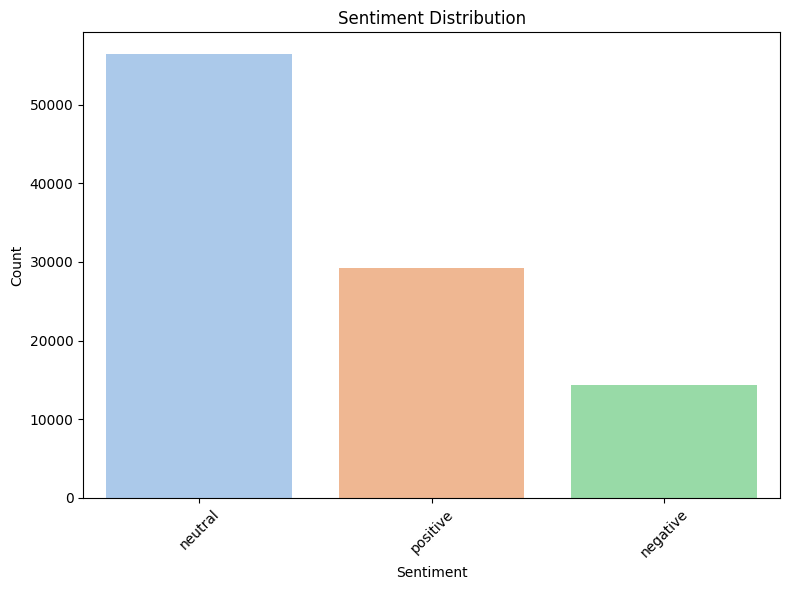

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="pastel")
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()